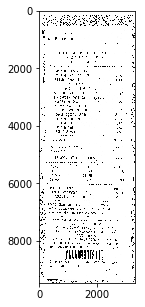

In [74]:
#!/usr/bin/python3
# 2018.01.16 01:11:49 CST
# 2018.01.16 01:55:01 CST
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

PATH_WORKDIR = os.getcwd()
PATH_IMAGES = os.path.join(PATH_WORKDIR, "../ticket_images")
FILENAME_IMAGE = 'output1.jpg'

def fig(w,h):
    plt.figure(figsize=(w,h))

def get_image_path(name: str):
    return os.path.join(PATH_IMAGES, name)

def read_image(file_name):
    return cv2.imread(file_name)

def plot_image(image, size_x=10, size_y=10):
    fig(size_x, size_y)
    plt.imshow(image)

    
#test
img = read_image(FILENAME_IMAGE)
img2 = Image.open(FILENAME_IMAGE)
plot_image(img, 5,5)
img2.show()


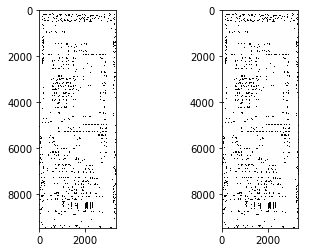

In [78]:
cv2.imwrite("noise-reduce.png", dst)

True

In [67]:
## (1) read
img = cv2.imread(FILENAME_IMAGE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plot_image(gray)

In [68]:
## (2) threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

In [69]:
## (3) minAreaRect on the nozeros
pts = cv2.findNonZero(threshed)
ret = cv2.minAreaRect(pts)

(cx,cy), (w,h), ang = ret
if w>h:
    w,h = h,w
    ang += 90

In [82]:
## (4) Find rotated matrix, do rotation
M = cv2.getRotationMatrix2D((cx,cy), ang, 1.0)
rotated = cv2.warpAffine(threshed, M, (img.shape[1], img.shape[0]))
img = rotated
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
fig(20,20)
plt.subplot(121),plt.imshow(rotated)
plt.subplot(122),plt.imshow(dst)
plt.show()

error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/photo/src/denoising.cpp:178: error: (-5:Bad argument) Type of input image should be CV_8UC3 or CV_8UC4! in function 'fastNlMeansDenoisingColored'


error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


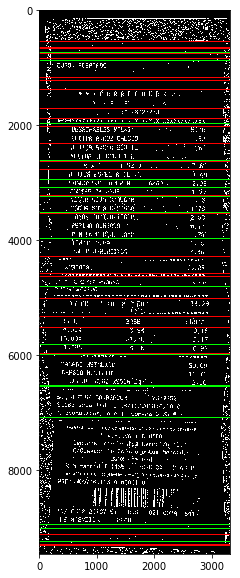

In [80]:
## (5) find and draw the upper and lower boundary of each lines
hist = cv2.reduce(rotated,1, cv2.REDUCE_AVG).reshape(-1)

th = 2
H,W = img.shape[:2]
uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]


rotated = cv2.cvtColor(rotated, cv2.COLOR_GRAY2BGR)
plot_image(rotated)
for y in uppers:
    cv2.line(rotated, (0,y), (W, y), (255,0,0), 1)

for y in lowers:
    cv2.line(rotated, (0,y), (W, y), (0,255,0), 1)

#plot_image(rotated)
#cv2.imwrite("result.png", rotated)